In [1]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import soundfile as sf

In [2]:
# load the audio file 
# the issue with mp3 files is a known issue due to how audioread works. You need to install ffmpeg to import mp3s
# MacOS can use homebrew (https://formulae.brew.sh/formula/ffmpeg)
# Windows can use chocolatey (https://chocolatey.org/packages/ffmpeg)
path = './fma_small/fma_small/000/000002.mp3'
# the result is a floating point time series representation of the audio
y, sr = librosa.load(path)

d:\python\python36\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [3]:
y # floating point time series

array([ 0.        ,  0.        ,  0.        , ..., -0.25594667,
       -0.25494778,  0.        ], dtype=float32)

In [4]:
len(y)

660984

In [5]:
sr # sample rate

22050

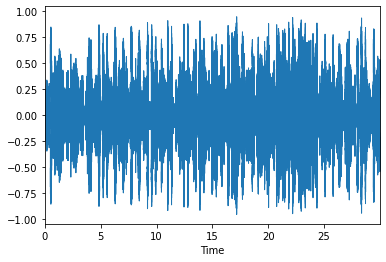

In [6]:
librosa.display.waveplot(y, sr=sr)

In [7]:
# apply a FT to the data
Y = librosa.stft(y)
# converting into energy levels(dB)
# according to documentation, np.abs(Y[f,t]) gets the magnitude of Y[f, t] where f is the frequency bin and t is the frame
# The default value of n_fft=2048 corresponds with a frame of 93ms for a sample rate of 22050Hz
# what does this mean? It means that each frame is 93ms.
n_fft=2048
Ydb = librosa.amplitude_to_db(np.abs(Y))

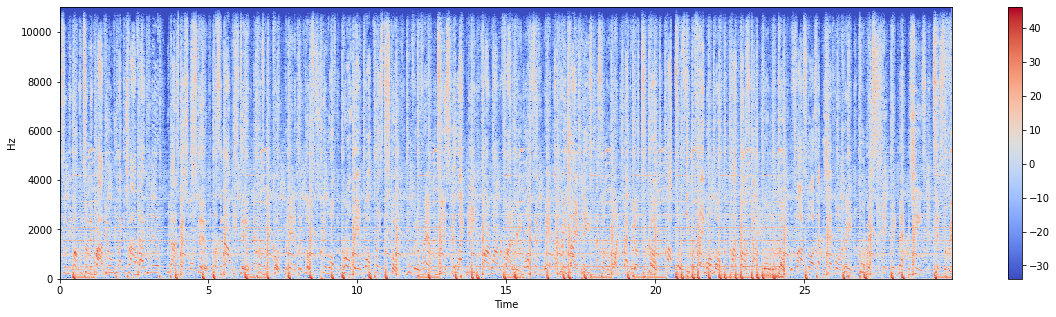

In [8]:
plt.figure(figsize=(20, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [9]:
Ydb

array([[-17.871435 , -11.971498 , -29.692863 , ...,  -3.509213 ,
        -18.531912 ,  11.923021 ],
       [-20.552452 ,  -9.204399 ,  -7.557807 , ...,  -3.5398564,
          3.99471  ,  14.893747 ],
       [-33.91565  ,  -6.486472 ,  -3.5115995, ...,  -1.6732031,
          5.167293 ,  18.601282 ],
       ...,
       [-33.91565  , -33.91565  , -33.91565  , ..., -33.91565  ,
        -33.91565  , -17.813599 ],
       [-33.91565  , -33.91565  , -33.91565  , ..., -33.91565  ,
        -33.91565  , -17.831123 ],
       [-33.91565  , -33.91565  , -33.91565  , ..., -33.91565  ,
        -33.91565  , -17.864124 ]], dtype=float32)

In [10]:
Ydb.shape

(1025, 1291)

In [11]:
1291*(93/1000)/4 # I can get the time back out, so every column is 93ms in this case

30.01575

In [12]:
(2048+1)/2 # this is how the number of frequency bins is calculated

1024.5

In [13]:
# indicies to frequency
frequencyBins = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
frequencyBins

array([0.00000000e+00, 1.07666016e+01, 2.15332031e+01, ...,
       1.10034668e+04, 1.10142334e+04, 1.10250000e+04])

In [14]:
# frame index to time
frames = [i for i in range(Ydb.shape[1])]
times = librosa.frames_to_time(frames, n_fft=n_fft, sr=sr)
times

array([ 0.04643991,  0.06965986,  0.09287982, ..., 29.9537415 ,
       29.97696145, 30.00018141])

In [15]:
Ydb.shape[1]

1291

In [16]:
times[0]

0.046439909297052155

In [17]:
# time to make a constellation map - marking significant freqencies
# for each frame, find the frequency with the max magnitude

In [18]:
# transpose the matrix so I can iterate by frame rather than frequency
YdbTranspose = Ydb.transpose((1,0))
YdbTranspose.shape

(1291, 1025)

In [19]:
stars = []
# for each frame
for i in range(YdbTranspose.shape[0]):
    # find the freqency index with the max magnitude
    stars.append([i, np.argmax(YdbTranspose[i], axis=0)])
stars

[[0, 21],
 [1, 25],
 [2, 25],
 [3, 24],
 [4, 24],
 [5, 24],
 [6, 26],
 [7, 25],
 [8, 47],
 [9, 46],
 [10, 46],
 [11, 21],
 [12, 21],
 [13, 22],
 [14, 46],
 [15, 46],
 [16, 46],
 [17, 24],
 [18, 24],
 [19, 9],
 [20, 6],
 [21, 5],
 [22, 4],
 [23, 4],
 [24, 99],
 [25, 98],
 [26, 6],
 [27, 6],
 [28, 6],
 [29, 6],
 [30, 25],
 [31, 24],
 [32, 23],
 [33, 6],
 [34, 6],
 [35, 6],
 [36, 6],
 [37, 6],
 [38, 6],
 [39, 6],
 [40, 6],
 [41, 6],
 [42, 24],
 [43, 24],
 [44, 24],
 [45, 46],
 [46, 9],
 [47, 6],
 [48, 6],
 [49, 6],
 [50, 6],
 [51, 17],
 [52, 17],
 [53, 98],
 [54, 57],
 [55, 107],
 [56, 108],
 [57, 80],
 [58, 79],
 [59, 87],
 [60, 85],
 [61, 101],
 [62, 59],
 [63, 58],
 [64, 98],
 [65, 19],
 [66, 19],
 [67, 25],
 [68, 27],
 [69, 21],
 [70, 20],
 [71, 105],
 [72, 52],
 [73, 52],
 [74, 76],
 [75, 25],
 [76, 25],
 [77, 25],
 [78, 25],
 [79, 24],
 [80, 22],
 [81, 25],
 [82, 26],
 [83, 8],
 [84, 26],
 [85, 102],
 [86, 102],
 [87, 69],
 [88, 68],
 [89, 24],
 [90, 24],
 [91, 24],
 [92, 24],
 [93,

In [20]:
# translate the indicies into values to plot
starsTranslatedX = []
starsTranslatedY = []
for value in stars:
    starsTranslatedX.append(times[value[0]])
    starsTranslatedY.append(frequencyBins[value[1]])
starsTranslatedX

[0.046439909297052155,
 0.06965986394557823,
 0.09287981859410431,
 0.11609977324263039,
 0.13931972789115646,
 0.16253968253968254,
 0.18575963718820862,
 0.2089795918367347,
 0.23219954648526078,
 0.25541950113378686,
 0.2786394557823129,
 0.301859410430839,
 0.3250793650793651,
 0.34829931972789113,
 0.37151927437641724,
 0.3947392290249433,
 0.4179591836734694,
 0.44117913832199546,
 0.46439909297052157,
 0.4876190476190476,
 0.5108390022675737,
 0.5340589569160997,
 0.5572789115646258,
 0.5804988662131519,
 0.603718820861678,
 0.626938775510204,
 0.6501587301587302,
 0.6733786848072563,
 0.6965986394557823,
 0.7198185941043084,
 0.7430385487528345,
 0.7662585034013606,
 0.7894784580498866,
 0.8126984126984127,
 0.8359183673469388,
 0.8591383219954648,
 0.8823582766439909,
 0.905578231292517,
 0.9287981859410431,
 0.9520181405895691,
 0.9752380952380952,
 0.9984580498866213,
 1.0216780045351475,
 1.0448979591836736,
 1.0681179138321995,
 1.0913378684807256,
 1.1145578231292517,
 1.

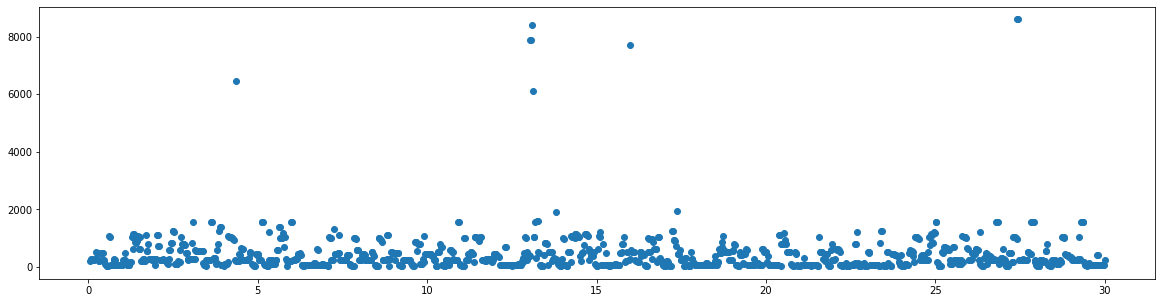

In [21]:
plt.figure(figsize=(20, 5))
# librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')
plt.scatter(starsTranslatedX,starsTranslatedY)

In [22]:
len(starsTranslatedY)
# I think these points are enough to be used at fingerprints
# let's see if we can get a CNN to do the same process.

1291

In [23]:
# get 100 files
import glob
files = glob.glob('./fma_small/fma_small/**/*.mp3', recursive = True)
samples = []
numSamples = 10
for file in files:
    if len(samples) < numSamples:
        samples.append(file)
    else:
        break
print(samples)

['./fma_small/fma_small\\000\\000002.mp3', './fma_small/fma_small\\000\\000005.mp3', './fma_small/fma_small\\000\\000010.mp3', './fma_small/fma_small\\000\\000140.mp3', './fma_small/fma_small\\000\\000141.mp3', './fma_small/fma_small\\000\\000148.mp3', './fma_small/fma_small\\000\\000182.mp3', './fma_small/fma_small\\000\\000190.mp3', './fma_small/fma_small\\000\\000193.mp3', './fma_small/fma_small\\000\\000194.mp3']


In [24]:
def parseData(timeSeries, sr, n_fft):
    Y = librosa.stft(timeSeries)
    Ydb = librosa.amplitude_to_db(np.abs(Y))
    frequencyBins = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    frames = [i for i in range(Ydb.shape[1])]
    times = librosa.frames_to_time(frames, n_fft=n_fft, sr=sr)
    # transpose the matrix so I can iterate by frame rather than frequency
    YdbTranspose = Ydb.transpose((1,0))
    stars = []
    # for each frame
    for i in range(YdbTranspose.shape[0]):
        # find the freqency index with the max magnitude
        stars.append([i, np.argmax(YdbTranspose[i], axis=0)])
    # translate the indicies into values to plot
    starsTranslatedY = []
    for value in stars:
        starsTranslatedY.append(frequencyBins[value[1]])
    return starsTranslatedY

In [25]:
def padSplit(timeSeries):
    if len(timeSeries) > 661500:
        timeSeries = timeSeries[:661500]
    # pad timeSeries so that the length is 661500
    newArray = np.zeros((661500,))
    newArray[:timeSeries.shape[0]] = timeSeries
    # divide into 10 second intervals (22050 * 10)
    a1 = newArray[:220500]
    a2 = newArray[220500:441000]
    a3 = newArray[441000:661500]
    return (np.asarray(a1), np.asarray(a2), np.asarray(a3))

In [34]:
data = pd.DataFrame()
features = pd.DataFrame()
n_fft=2048
# for each file
for file in samples:
    # load the time series
    y, sr = librosa.load(file)
    # pad to 30 seconds and split into 3 pieces of length 10 seconds each
    y1, y2, y3 = padSplit(y)
    columnsY = [i for i in range(len(y1))]
    # find fingerprint for each 
    s1, s2, s3 = parseData(y1, sr, n_fft), parseData(y2, sr, n_fft), parseData(y3, sr, n_fft)
    columns = [i for i in range(len(s1))]
    features = features.append(pd.DataFrame(np.array(y1).reshape(1, -1), columns = columnsY))
    features = features.append(pd.DataFrame(np.array(y2).reshape(1, -1), columns = columnsY))
    features = features.append(pd.DataFrame(np.array(y3).reshape(1, -1), columns = columnsY))
    data = data.append(pd.DataFrame(np.array(s1).reshape(1, -1), columns = columns))
    data = data.append(pd.DataFrame(np.array(s2).reshape(1, -1), columns = columns))
    data = data.append(pd.DataFrame(np.array(s3).reshape(1, -1), columns = columns))

d:\python\python36\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [35]:
data

,0,1,2,3,4,5,6,7,8,9,...,421,422,423,424,425,426,427,428,429,430
0,226.098633,269.165039,269.165039,258.398438,258.398438,258.398438,279.931641,269.165039,506.030273,495.263672,...,96.899414,96.899414,269.165039,1065.893555,183.032227,462.963867,452.197266,452.197266,462.963867,1012.060547
0,452.197266,441.430664,441.430664,430.664062,409.130859,398.364258,258.398438,258.398438,258.398438,32.299805,...,64.599609,64.599609,64.599609,645.996094,624.462891,538.330078,527.563477,538.330078,538.330078,441.430664
0,398.364258,387.597656,64.599609,64.599609,64.599609,64.599609,64.599609,64.599609,64.599609,64.599609,...,64.599609,64.599609,64.599609,64.599609,64.599609,64.599609,64.599609,64.599609,247.631836,2056.420898
0,86.132812,53.833008,215.332031,86.132812,75.366211,64.599609,53.833008,43.066406,53.833008,53.833008,...,624.462891,495.263672,473.730469,236.865234,312.231445,86.132812,86.132812,107.666016,150.732422,150.732422
0,129.199219,139.965820,333.764648,344.531250,301.464844,312.231445,312.231445,1884.155273,559.863281,538.330078,...,215.332031,215.332031,215.332031,107.666016,107.666016,581.396484,581.396484,753.662109,753.662109,742.895508
0,1001.293945,473.730469,462.963867,96.899414,75.366211,86.132812,107.666016,107.666016,53.833008,43.066406,...,53.833008,43.066406,53.833008,53.833008,107.666016,107.666016,107.666016,107.666016,107.666016,107.666016
0,1679.589844,549.096680,549.096680,269.165039,258.398438,258.398438,258.398438,204.565430,75.366211,53.833008,...,1108.959961,1108.959961,1108.959961,86.132812,75.366211,53.833008,53.833008,53.833008,1108.959961,1108.959961
0,1475.024414,1475.024414,1475.024414,1851.855469,1851.855469,1851.855469,1851.855469,1851.855469,1851.855469,1851.855469,...,1098.193359,1119.726562,1119.726562,1108.959961,1119.726562,1119.726562,1108.959961,1119.726562,1108.959961,1108.959961
0,1851.855469,1851.855469,1851.855469,75.366211,53.833008,43.066406,43.066406,1485.791016,1485.791016,2228.686523,...,53.833008,43.066406,1108.959961,1108.959961,1108.959961,366.064453,366.064453,1862.622070,1851.855469,53.833008
0,301.464844,301.464844,301.464844,290.698242,290.698242,290.698242,290.698242,301.464844,301.464844,290.698242,...,150.732422,150.732422,150.732422,150.732422,150.732422,150.732422,150.732422,150.732422,150.732422,150.732422


In [36]:
dataInt = data.astype(int)
dataInt

,0,1,2,3,4,5,6,7,8,9,...,421,422,423,424,425,426,427,428,429,430
0,226,269,269,258,258,258,279,269,506,495,...,96,96,269,1065,183,462,452,452,462,1012
0,452,441,441,430,409,398,258,258,258,32,...,64,64,64,645,624,538,527,538,538,441
0,398,387,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,247,2056
0,86,53,215,86,75,64,53,43,53,53,...,624,495,473,236,312,86,86,107,150,150
0,129,139,333,344,301,312,312,1884,559,538,...,215,215,215,107,107,581,581,753,753,742
0,1001,473,462,96,75,86,107,107,53,43,...,53,43,53,53,107,107,107,107,107,107
0,1679,549,549,269,258,258,258,204,75,53,...,1108,1108,1108,86,75,53,53,53,1108,1108
0,1475,1475,1475,1851,1851,1851,1851,1851,1851,1851,...,1098,1119,1119,1108,1119,1119,1108,1119,1108,1108
0,1851,1851,1851,75,53,43,43,1485,1485,2228,...,53,43,1108,1108,1108,366,366,1862,1851,53
0,301,301,301,290,290,290,290,301,301,290,...,150,150,150,150,150,150,150,150,150,150


In [40]:
features = abs(features) * 1000

In [41]:
featuresInt = features.astype(int)

In [43]:
featuresInt

,0,1,2,3,4,5,6,7,8,9,...,220490,220491,220492,220493,220494,220495,220496,220497,220498,220499
0,0,0,0,0,0,0,0,0,0,0,...,150,200,127,87,121,163,142,222,178,236
0,178,232,70,184,117,129,22,166,43,101,...,34,1,5,345,557,563,510,436,412,200
0,170,346,287,314,363,305,84,242,359,244,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,9,35,54,1,36,20,66,81,9,48
0,5,96,45,103,202,83,261,367,339,353,...,134,71,24,57,116,156,139,102,118,106
0,110,134,145,122,40,19,26,38,60,48,...,114,122,117,126,123,117,114,116,112,107
0,0,0,0,0,0,0,0,0,0,0,...,280,331,399,381,294,155,65,81,145,238
0,256,144,35,175,200,110,23,7,54,74,...,119,79,65,122,230,268,195,74,44,66
0,11,81,107,148,171,132,47,16,130,376,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,60,60,59,59,60,59,59,61,59,61


In [42]:
features

,0,1,2,3,4,5,6,7,8,9,...,220490,220491,220492,220493,220494,220495,220496,220497,220498,220499
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,150.849730,200.790793,127.127469,87.606698,121.663459,163.436428,142.768443,222.557157,178.906664,236.734033
0,1.780183e+02,2.324068e+02,7.001843e+01,1.841413e+02,1.176524e+02,1.297867e+02,2.295784e+01,1.663689e+02,4.304011e+01,101.704486,...,34.196079,1.074953,5.868789,345.076591,557.362914,563.041031,510.035574,436.217546,412.590861,200.961053
0,1.704645e+02,3.466706e+02,2.879847e+02,3.140612e+02,3.635454e+02,3.051164e+02,8.424003e+01,2.421288e+02,3.598673e+02,244.675368,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,9.434860,35.554856,54.648984,1.743949,36.339186,20.762779,66.936821,81.151888,9.738103,48.355468
0,5.428872e+00,9.600680e+01,4.587272e+01,1.038034e+02,2.023088e+02,8.347584e+01,2.619905e+02,3.677330e+02,3.397484e+02,353.172958,...,134.697661,71.650200,24.308687,57.399336,116.064072,156.390458,139.169708,102.759711,118.471906,106.224224
0,1.102550e+02,1.345752e+02,1.457076e+02,1.227573e+02,4.025717e+01,1.916962e+01,2.613632e+01,3.830914e+01,6.009480e+01,48.540890,...,114.752688,122.573078,117.937334,126.686350,123.878352,117.143281,114.997186,116.572767,112.021938,107.821293
0,4.479460e-08,8.835452e-08,1.511561e-07,2.341220e-07,3.406648e-07,4.692989e-07,6.162037e-07,7.773389e-07,9.409997e-07,0.000001,...,280.858845,331.799984,399.983346,381.207705,294.867039,155.898541,65.825842,81.776626,145.219773,238.594115
0,2.564358e+02,1.440274e+02,3.529985e+01,1.758110e+02,2.008040e+02,1.101882e+02,2.319950e+01,7.334468e+00,5.405007e+01,74.028507,...,119.109757,79.407401,65.492734,122.046396,230.560660,268.115610,195.201129,74.482210,44.380985,66.357695
0,1.107538e+01,8.121131e+01,1.078465e+02,1.486036e+02,1.714080e+02,1.328319e+02,4.774175e+01,1.630558e+01,1.304768e+02,376.484215,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,60.598511,60.387574,59.962586,59.874889,60.119417,59.992850,59.673820,61.478347,59.001446,61.368499


In [44]:
dataInt.to_csv('target.csv')

In [45]:
featuresInt.to_csv('features.csv')